# Uncovering Fake News: Classification and Visualization with PCA and t-SNE

## Table of Contents
1. [Introduction](##introduction)
2. [Data Preprocessing](#preprocessing)
3. [Data Visualization](#visualization)
4. [Model Training and Evaluation](#training_evaluation)
5. [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>


 The spread of fake news has become a major issue in today's digital world. The rise of social media and the ease of sharing information has made it easier for fake news to be disseminated to a wider audience. To combat this problem, natural language processing (NLP) techniques can be employed to automatically detect fake news.

In this notebook, we will explore the use of pretrained GloVe word embeddings to classify news articles as either real or fake. GloVe stands for Global Vectors for Word Representation, and it is a popular word embedding technique that represents words as dense vectors in a high-dimensional space. By using pretrained GloVe embeddings, we can leverage the power of machine learning and save time and computational resources.

We will use a dataset of news articles, where each article has been labeled as either real or fake. We will preprocess the text data by tokenizing the words and converting them to GloVe embeddings. Then, we will use the mean of the GloVe embeddings for each document as the input feature for our classification model. We will experiment with MLPClassifier. 

By the end of this notebook, you will have a better understanding of how to use pretrained GloVe embeddings for text classification and how to apply different classification algorithms to solve the problem of fake news detection. Lets start by importing the neccesary libraries.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
import re
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Now that we have imported the necessary libraries, let's explore the dataframe and select the relevant columns. The dataset contains four columns, but we will only use the "text" and "label" columns. The "Unnamed: 0" and "title" columns will be discarded since the former contains random numbers and the latter may not be relevant to our classification task.

In [2]:
df = pd.read_csv(r"/kaggle/input/textdb3/fake_or_real_news.csv") 
df.info(verbose=False)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Columns: 4 entries, Unnamed: 0 to label
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.columns.to_list()
df.drop('Unnamed: 0', axis=1, inplace=True) #drop unnamed an title columns 
df.drop('title', axis=1, inplace=True)
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [4]:
df.describe()

,text,label
count,6335,6335
unique,6060,2
top,"Killing Obama administration rules, dismantlin...",REAL
freq,58,3171


It is important to check if the dataset is balanced or unbalanced, as this can affect the choice of evaluation metrics and methods. To visualize the distribution of the two classes in the dataset, we can create a pie chart 

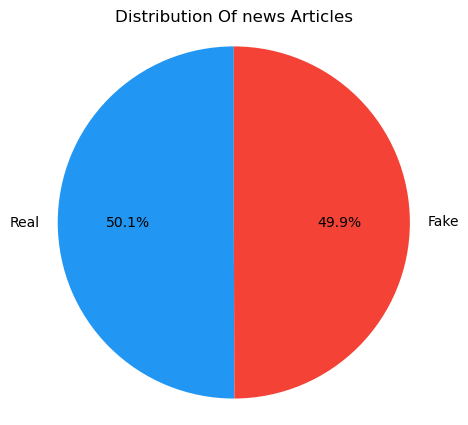

In [5]:
fig = plt.figure(figsize=(5,5))
labels = 'Real', 'Fake'
counts = df.label.value_counts().values
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2196f3', '#f44336' ])
plt.axis('equal')
plt.title("Distribution Of news Articles")
plt.show()

By visualizing the distribution of the two classes, we can see that the dataset is balanced, with both classes being represented almost equally. This means that we can use accuracy as a suitable evaluation metric for our classification models. However, we can also use other metrics such as precision, recall, and F1-score to gain a better understanding of the performance of our models. 
To prepare the label column for classification, we need to convert the string labels "FAKE" and "REAL" to numerical labels 1 and 0, respectively.

## 2. Data Preprocessing <a name="preprocessing"></a>

In [6]:
# assign variables 
X = df.text.values      # independent variable         
y = df.label.values      # dependent variables 

y = (y=="FAKE") * 1   
y


array([1, 1, 0, ..., 1, 0, 0])

We will now use pretrained GloVe word embeddings, which can be downloaded from the GloVe website and loaded into our code. To load the embeddings into a dictionary, we will use a function to retrieve the embedding of a given word. It's important to use the get method to handle words that are not in the embeddings, and in such cases, we'll replace them with a list of zeros, which is the recommended way in the literature for dealing with out-of-vocabulary words.

Before computing the mean of the word embeddings for each document, we need to preprocess the text data. We'll use the re module of Python to remove any non-alphanumeric characters and convert the text to lowercase.

In [7]:
#word embedding converted to lists 
import os
embeddings_index = {}
f = open(os.path.join(r'/kaggle/input/glove-embeddings/glove300.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()



In [8]:
def get_embedding(word):
    emb = embeddings_index.get(word, [0] * 300)
    return emb

In [9]:
# vectorize the text  all in minus or mayus as they have to be the same 

def preprocess_text(text):
    lower = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', lower)
    x= re.sub(r'^RT[\s]+', '', text)
    x= re.sub(r'https?://[^\s\n\r]+', '', x)
    x= re.sub(r'#','', x)
    x= re.sub("[^a-zA-Z0-9]", " ", x)
    x = word_tokenize(x)
    emb = np.zeros((300,))
    for word in x:
        emb += get_embedding(word)
    emb = emb / len(x)    
    return emb

#Word embeddings each column is a word represented in numbers to explain the computer the context of each word in a text corpus 
 



Here is an example of how the inputs would look like. This are the 10 firs elements but remember that we are ussing 300 size word vectors.

In [10]:
preprocess_text ('today was a earthquake in Indiana')[:10]

array([-1.68152066e-01, -5.67740022e-02, -1.71290826e-01, -1.77244838e-01,
       -1.52448829e-01,  3.37168264e-04, -1.09450000e-01, -2.30342536e-01,
        5.21203354e-02, -1.20578333e+00])

Now lets apply the preprocess text function to every article.

In [11]:
X_procesado = []
for article in X:
    X_procesado.append(preprocess_text(article))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, stratify= y, train_size = 0.9, shuffle = True, random_state = 0 )

 In some cases in this dataset some of the strings are left empty due to the preprocessing function, so we have to replace NaN with zeros for the code to run correctly.

In [13]:

def replace_nan_with_zero(arr):

    result = np.apply_along_axis(np.nan_to_num, 1, arr)
    
    return result

X_train = np.asarray(X_train)
X_train = replace_nan_with_zero(X_train)

X_test = np.asarray(X_test)
X_test = replace_nan_with_zero(X_test)


In [14]:
print(X_train[0][0:10])

[-0.05679338  0.05920508 -0.02189424 -0.09837811 -0.02215116  0.0232635
 -0.0611564  -0.11329673  0.05900343 -1.31145052]


## 3. Data Visualization <a name="visualization"></a>

Now we will combine the X_train and X_test arrays, apply PCA to reduce the dimensionality to 2 components, and then plot the resulting data points in a 2D graph. The colors used for each set and label are blue for X_train with label 0, green for X_train with label 1, red for X_test with label 0, and orange for X_test with label 1.

We are using PCA to reduce the dimensionality of the data and visualize it in a 2D graph, which can help us understand the relationship between the data points and their labels. By using different colors for each set and label, we can easily distinguish between them and analyze their distribution.

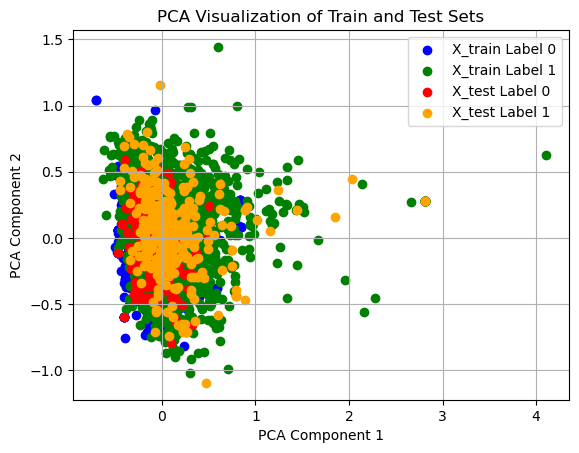

In [15]:
from sklearn.decomposition import PCA

X = np.vstack((X_train, X_test))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca = X_pca[:len(X_train)]
X_test_pca = X_pca[len(X_train):]

plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='blue', label='X_train Label 0')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='green', label='X_train Label 1')
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color='red', label='X_test Label 0')
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color='orange', label='X_test Label 1')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Train and Test Sets')
plt.grid()
plt.legend()

# Display the plot
plt.show()

 We can observe that there is little room for establishing decision boundaries in this graph. However, there is differentiation between points with labels 1 and 0. We can attempt to use other visualization algorithms to enhance class separation and determine if this can indeed be achieved.
 
We're using TSNE from the sklearn.manifold module to fit the combined X_train and X_test data to 2D t-SNE components. We're using a perplexity of 30 and a learning rate of 200, which are common parameters for t-SNE.

The resulting plot will show the train and test sets in a 2D space with different colors for each label. The advantage of t-SNE over PCA is that it can often provide better separation of the data points, especially when the data is highly nonlinear or has many clusters. However, t-SNE can also be computationally expensive and sensitive to the choice of hyperparameters.



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


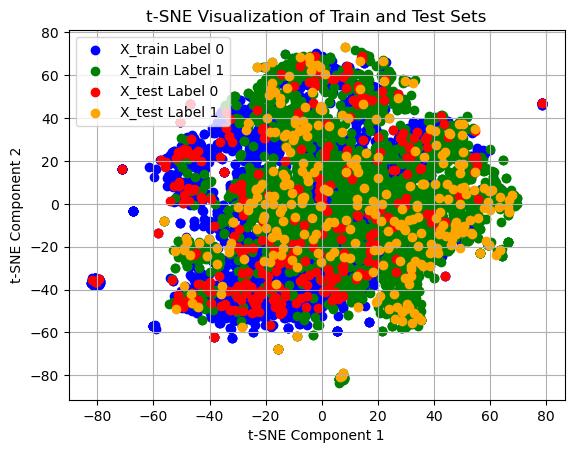

In [16]:
from sklearn.manifold import TSNE


X = np.vstack((X_train, X_test))

tsne = TSNE(n_components=2, perplexity=30 , learning_rate= 200)
X_tsne = tsne.fit_transform(X)

X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

plt.scatter(X_train_tsne[y_train == 0, 0], X_train_tsne[y_train == 0, 1], color='blue', label='X_train Label 0')
plt.scatter(X_train_tsne[y_train == 1, 0], X_train_tsne[y_train == 1, 1], color='green', label='X_train Label 1')
plt.scatter(X_test_tsne[y_test == 0, 0], X_test_tsne[y_test == 0, 1], color='red', label='X_test Label 0')
plt.scatter(X_test_tsne[y_test == 1, 0], X_test_tsne[y_test == 1, 1], color='orange', label='X_test Label 1')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Train and Test Sets')
plt.grid()
plt.legend()

# Display the plot
plt.show()

After visualizing the data using t-SNE and PCA, let's now fit these transformed features into a model and compare their performance. Upon initial inspection, PCA appears to separate the classes more effectively than t-SNE. However, it's possible that the classifier can capture relationships that are not immediately obvious to the naked eye. Additionally, we will evaluate the model using the original data prior to applying PCA and t-SNE transformations to determine their effectiveness in classification tasks. We also want to take a look on decision boundaries.

In [17]:
def plot_decision_boundary(X, y, model, ax, title):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

In [18]:
clf = MLPClassifier(alpha=0.001, hidden_layer_sizes=(400, 5), random_state=1, early_stopping= True, activation= 'relu', learning_rate= 'adaptive')

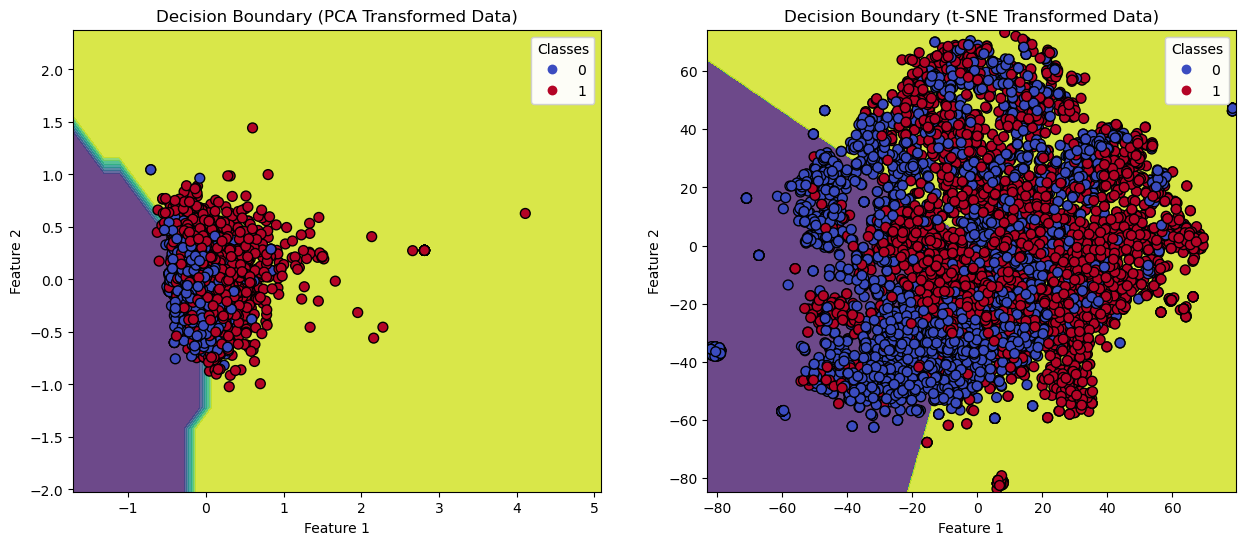

In [19]:
clf.fit(X_train_pca, y_train)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_decision_boundary(X_train_pca, y_train, clf, axes[0], 'Decision Boundary (PCA Transformed Data)')
plot_decision_boundary(X_train_tsne, y_train, clf, axes[1], 'Decision Boundary (t-SNE Transformed Data)')

plt.show()

At simple view we can see again that PCA performs better but now lets take a look on some metrics.

## 4. Model Training and Evaluation <a name="training_evaluation"></a>

In [20]:
from sklearn.metrics import f1_score
# Train and evaluate the classifier on the original data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred)
f1_orig = f1_score(y_test, y_pred)

# Train and evaluate the classifier on PCA transformed data
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

# Train and evaluate the classifier on t-SNE transformed data
clf.fit(X_train_tsne, y_train)
y_pred_tsne = clf.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
f1_tsne = f1_score(y_test, y_pred_tsne)

# Create a pandas DataFrame to store the results
results = pd.DataFrame({
    'Accuracy': [accuracy_orig, accuracy_pca, accuracy_tsne],
    'F1 Score': [f1_orig, f1_pca, f1_tsne]
}, index=['Original Data', 'PCA Transformed Data', 't-SNE Transformed Data'])

# Display the results
print(results)

                        Accuracy  F1 Score
Original Data           0.888013  0.887122
PCA Transformed Data    0.714511  0.688468
t-SNE Transformed Data  0.694006  0.681967


## 5. Conclusion <a name="conclusion"></a>

In this notebook, we explored the challenging task of classifying news articles as real or fake using a multilayer perceptron (MLP) classifier. To gain insights into the structure of our high-dimensional data, we employed dimensionality reduction techniques, specifically PCA and t-SNE, for visualization purposes.

The results demonstrated that our classifier achieved the best performance using the original data, with an accuracy of 88.80% and an F1 score of 88.71%. While PCA and t-SNE provided valuable visualizations, their transformed data resulted in lower classification performance, with accuracies of 71.14% and 68.77% and F1 scores of 68.61% and 66.33%, respectively.

We hope you found this notebook insightful and enjoyable! If you liked it, please consider giving it a thumbs-up and checking out our profile for more interesting content. Your support and feedback are greatly appreciated!

Also here a a code you can use to classify your own news based on the original data model.

In [21]:
clf.fit(X_train, y_train)
def classify(texto):
    entrada=preprocess_text(texto).reshape(1,-1)
    resultado = clf.predict(entrada)
    if resultado [0] == 1:
        print('Fake News')
        print(resultado.shape)
    else:
        print('Real News')
    return resultado

In [22]:
classify("""
Saudi oil giant Aramco has announced a record profit of $161.1bn (£134bn) for 2022, helped by soaring energy prices and bigger volumes.

It represents a 46.5% rise for the state-owned company, compared with last year.

It is the latest energy firm to report record profits, after energy prices spiked following Russia's full-scale invasion of Ukraine in February 2022.

America's ExxonMobil made $55.7bn, and Britain's Shell reported $39.9bn.

Aramco also declared a dividend of $19.5bn for the October to December quarter of 2022, to be paid in the first quarter of this year.

Most of that will go to the Saudi government, which owns nearly 95% of the shares in the company.

Brent crude oil, the benchmark oil price, now trades at around $82 a barrel - though prices exceeded $120 a barrel last March, after Russia's invasion, and June.

"Aramco rode the wave of high energy prices in 2022," said Robert Mogielnicki of the Arab Gulf States Institute in Washington. "It would have been difficult for Aramco not to perform strongly in 2022."

White House calls Exxon record profit 'outrageous'
Shell reports highest profits in 115 years
In a statement on Sunday, Aramco said the company results were "underpinned by stronger crude oil prices, higher volumes sold and improved margins for refined products".

Aramco's president and CEO Amin Nasser said: "Given that we anticipate oil and gas will remain essential for the foreseeable future, the risks of underinvestment in our industry are real - including contributing to higher energy prices."

To address those challenges, he said, the company would not only focus on expanding oil, gas and chemicals production - but also invest in new lower-carbon technologies.

Aramco - the world's second-most valuable company only behind America's Apple - is a major emitter of greenhouse gas emissions that contribute to climate change.

Responding to Aramco's announcement, Amnesty International's secretary general Agnès Callamard said: "It is shocking for a company to make a profit of more than $161bn in a single year through the sale of fossil fuel - the single largest driver of the climate crisis."

She added: "It is all the more shocking because this surplus was amassed during a global cost-of-living crisis and aided by the increase in energy prices resulting from Russia's war of aggression against Ukraine."

Saudi Arabia is the largest producer in the oil cartel Opec (Organization of the Petroleum Exporting Countries).

The Gulf kingdom has been condemned for a range of human rights abuses: its involvement in the conflict in neighbouring Yemen, the murder in 2018 of journalist Jamal Khashoggi, for jailing dissidents, and for the widespread use of capital punishment.

In a separate development on Sunday, Iran said its oil exports had reached their highest level since the re-imposition of US sanctions in 2018.

Oil Minister Javad Owji said exports increased by 83 million barrels in 2022 compared with the previous 12 months. In Iran, a new year starts in March.

Analysts say the rise is due to greater shipments to Iranian allies China and Venezuela.

Tehran's export revenues took a significant hit after then-US President Donald Trump pulled out of a landmark nuclear deal five years ago.

The US sanctions, coupled with economic mismanagement and corruption, have meant that the Iranian economy has not had any substantive growth in the past decade. And by some measures, it is still 4-8% smaller than it was back in 2010.
           """)

Real News


array([0])